# Введение в регрессионный анализ

## Необязательное домашнее задание №2

*Алла Тамбовцева*

В задании предлагается поработать с файлом `salaries.csv`. Показатели в файле:

В этом файле сохранены данные по сотрудникам университета в США, а именно следующие их характеристики:

* `rank`: должность;
* `discipline`: тип преподаваемой дисциплины (`A` – теоретическая, `B` – практическая);
* `phd`: число лет с момента получения степени PhD;
* `service`: число лет опыта работы;
* `sex`: пол;
* `salary`: заработная плата за 9 месяцев, в долларах.

### Задание 1

Загрузите данные из файла `salaries.csv` и сохраните их в датафрейм `df`. Выведите описательные статистики для всех числовых столбцов датафрейма. Выведите описательные статистики для всех текстовых столбцов датафрейма. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("salaries.csv")
df.describe()

,Unnamed: 0,phd,service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


In [4]:
df.describe(include="object")

,rank,discipline,sex
count,397,397,397
unique,3,2,2
top,Prof,B,Male
freq,266,216,358


### Задание 2

Сгруппируйте строки датафрейма `df` по полу сотрудника и выведите описательные статистики для заработной платы для мужчин и женщин. Прокомментируте полученные результаты. 

In [5]:
# 
# однако минимальная заработная плата выше у женщин
# среди мужчин, скорее всего, есть сотрудники с нетипично высокой з/п,
# 

df.groupby("sex")["salary"].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,39.0,101002.410256,25952.127317,62884.0,77250.0,103750.0,117002.50,161101.0
Male,358.0,115090.418994,30436.927344,57800.0,92000.0,108043.0,134863.75,231545.0


>Средняя и медианная заработная плата мужчин выше, однако минимальная заработная плата выше у женщин. Среди мужчин, скорее всего, есть сотрудники с нетипично высокой зарплатой (верхний квартиль ~135 тысяч, максимум ~232 тысячи).

### Задание 3

Рассмотрим взаимосвязь между опытом работы (стаж в годах) и заработной платой сотрудников. Какая переменная является зависимой, а какая – независимой (объясняющей)? 

Постройте диаграмму рассеивания для визуализации связи между этими показателями, расположив независимую переменную по горизонтальной оси, зависимую – по вертикальной. Прокомментируйте полученный график. Можно ли считать связь между опытом работы и заработной платой линейной?

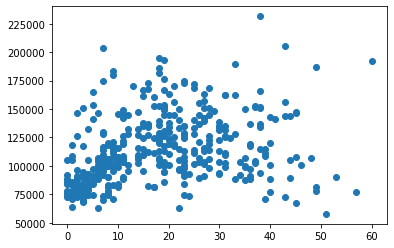

In [6]:
# вариант 1: с plt как на семинаре

from matplotlib import pyplot as plt
plt.scatter(df["service"], df["salary"]);

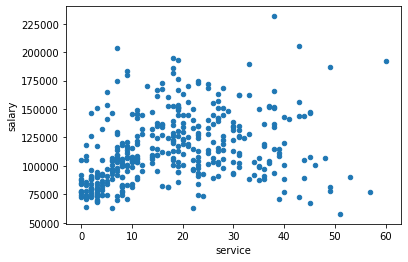

In [7]:
# вариант 2: только pandas, посимпатичнее

df.plot("service", "salary", kind = "scatter");

>Зависимая переменная – заработная плата, независимая (объясняющая) – опыт работы в годах. Связь не очень похожа на линейную, зависимость больше похожа на квадратичную, точки формируют немного растянутую параболу с ветвями вниз. Пик/перегиб параболы в районе 20-25 лет, у сотрудников со стажем менее 20-25 лет с увеличением стажа заработная плата тоже увеличивается, а у сотрудников со стажем свыше 25 лет в большинстве случаев  наблюдается обратная зависимость, с годами заработная плата уменьшается.

### Задание 4

Даже если связь между опытом работы и заработной платой не очень похожа на линейную, никто не запрещает оценивать на таких данных линейную регрессионную модель. Однако полученная модель будет не самого лучшего качества и, скорее всего, для неё не будут выполняться допущения, которые вы будете обсуждать на следующих лекциях. На практике в случаях, если есть основания считать, что связь между показателями больше похожа на квадратичную, чем на линейную, строят квадратичную регрессию или добавляют в линейную модель независимую переменную в квадрате (`y ~ x + x^2` вместо `y ~ x`), получая тем самым уже не парную, а множественную регрессию.

Перед нами такой задачи не стоит, пока мы обсуждаем простую парную регрессию. Чтобы исключить эффект других факторов (помимо стажа), которые могут сказываться на заработной плате, возьмём выборку сотрудников с одинаковыми характеристиками.

Выберите строки, соответствующие сотрудникам мужского пола (`Male`), преподающим практические дисциплины (`B`), и сохраните их в датафрейм `df_male`. Выберите строки, соответствующие сотрудникам женского пола, преподающим практические дисциплины (`B`), и сохраните их в датафрейм `df_female`.

In [8]:
df_male = df[(df["sex"] == "Male") & (df["discipline"] == "B")]
df_female = df[(df["sex"] == "Female") & (df["discipline"] == "B")]

### Задание 5

Используя данные из датафрейма `df_male` и функцию `ols()` из библиотеки `statsmodels`, постройте линейную модель, которая описывает связь между опытом работы и заработной платой. Выведите оценки коэффициентов модели, проинтерпретируйте полученные результаты. Запишите уравнение полученной модели (с конкретными числами).

In [9]:
from statsmodels.formula.api import ols

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
model_male = ols("salary ~ service", data = df_male).fit()
print(model_male.params)

Intercept    100143.401556
service        1157.255243
dtype: float64


>Уравнение (коэффициенты округлены): $\widehat{salary}_i = 100143 + 1157 \times service_i$. Согласно модели, средняя заработная плата (за 9 месяцев) сотрудников мужского пола без опыта работы равна 100143 долларам. При увеличении опыта работы на один год заработная плата (за 9 месяцев) мужчин, преподающих практические дисциплины, в среднем, увеличивается на 1157 долларов.

### Задание 6

Используя данные из датафрейма `df_female` и функцию `ols()` из библиотеки `statsmodels`, постройте линейную модель, которая описывает связь между опытом работы и заработной платой. Выведите оценки коэффициентов модели, проинтерпретируйте полученные результаты. Запишите уравнение полученной модели (с конкретными числами).

In [11]:
model_female = ols("salary ~ service", data = df_female).fit()
print(model_female.params)

Intercept    77974.986829
service       2850.817455
dtype: float64


>Уравнение (коэффициенты округлены): $\widehat{salary}_i = 77975 + 2851 \times service_i$. Согласно модели, средняя заработная плата (за 9 месяцев) сотрудников женского пола без опыта работы равна 77975 долларам. При увеличении опыта работы на один год заработная плата (за 9 месяцев) женщин, преподающих практические дисциплины, в среднем, увеличивается на 2851 доллар.

### Задание 7

Сравните коэффициенты, полученные в моделях, оценённых на данных из `df_male` и `df_female`. У кого, у мужчин или женщин, увеличение опыта работы сильнее сказывается на заработной плате?

In [12]:
print("b0", model_male.params[0], model_female.params[0])
print("b1", model_male.params[1], model_female.params[1])

b0 100143.40155634304 77974.98682939679
b1 1157.255242752027 2850.817455439457


>У женщин, так как значение коэффициента $\hat{b}_1$ больше (2851 против 1157). Интересное наблюдение: средняя «стартовая» заработная плата у женщин без опыта работы, преподающих практические дисциплины, ниже, чем у мужчин с такими же характеристиками (77975 против 100143), однако с увеличением опыта работы заработная плата женщин растёт быстрее, чем у мужчин.

### Задание 8

В библиотеке `seaborn` для продвинутой визуализации данных есть функции, позволяющие строить диаграммы рассеивания с добавленными на них регрессионными прямыми. 

Ниже приведён код, который выбирает строки, соответствующие сотрудникам, преподающих практические дисциплины, строит диаграммы рассеивания между опытом работы в годах и заработной платой по группам (мужчины/женщины) и добавляет на них регрессионные прямые. Можете запустить код и сопоставить полученные графики с уравнениями линейной регрессии, полученные в заданиях 5-6.

**Примечание.** На ТВиМС мы использовали эту библиотеку, возможно, она у вас уже установлена, если нет, раскомментируйте строку с `!pip install ...`.

In [ ]:
#!pip install seaborn

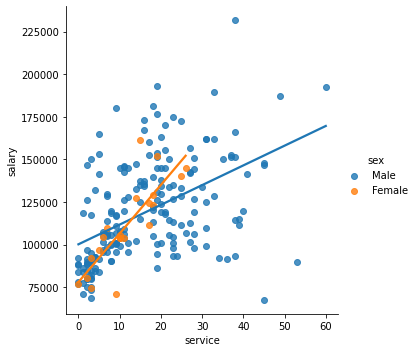

In [13]:
import seaborn as sns

df_b = df[df["discipline"] == "B"]

# на одном графике

# hue – основание группировки, 
# точки и прямые для разных групп разного цвета
# ci=None, выключаем доверительный интервал для угла наклона, пока не нужен

sns.lmplot(data=df_b, x="service", y="salary", hue="sex", ci=None);

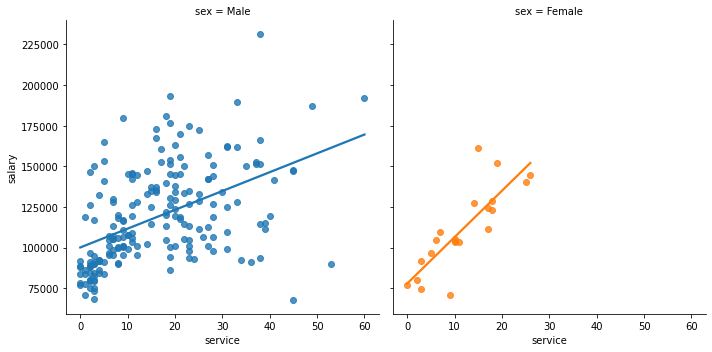

In [14]:
# в отдельных окнах, col – деление на столбцы

sns.lmplot(data=df_b, x="service", y="salary",
           hue="sex", col = "sex", ci=None);